# Виконав Лабунський Петро

## Завдання
Створити скрипт Python або Notebook з наступним функціоналом:
1. Зчитати та завантажити тестове чорно-біле та кольорове зображення.
2. Відобразити чорно-біле та кольорове зображення.
3. Перетворити зображення з колірної моделі BGR в колірні моделі RGB і HSV та відобразити.
4. Окремо відобразити колірні канали для зображень із колірними моделями RGB та HSV.
5. Скопіювати область інтересу (Region of Interest) чорно-білого зображення, використовуючи наступні діапазони 0:img.shape[0]/2, 0:img.shape[1]/2.
6. Зберегти область інтересу (Region of Interest).

### Додаткові завдання:
1. Перетворити зображення з колірної моделі BGR в колірну модель HSV за допомогою формул.
2. Реалізувати функцію для визначення колірної відстані (Delta E76, Delta E94).

## Імпорт бібліотек та пакетів

Завантажуємо бібліотеки.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Зчитати та завантажити тестове чорно-біле та кольорове зображення.

### Зчитаємо тестове кольорове зображення та конвертуєму його в чорно-біле та кольрові зображення

In [2]:
URL = "input\image.jpg"
img_bgr = cv2.imread(URL)
img_gray = cv2.imread(URL, cv2.IMREAD_GRAYSCALE) 

cv2.imwrite("output\image_bgr.png", img_bgr)
cv2.imwrite("output\image_gray.png", img_gray)

True

In [3]:
def no_axes(a):
    return plt.xticks([]), plt.yticks([]), plt.title(str(a))

## 2. Відобразити чорно-біле та кольорове зображення

Відображення зображень за допомогою OpenCV

In [4]:
# cv2.imshow("Image", img_bgr) #вхідні дані сприймає в BGR
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Відображення зображень за допомогою matplotlib

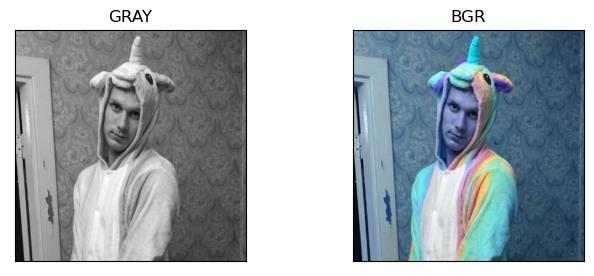

In [5]:
plt.figure(figsize=(8, 3))
plt.subplot(121), plt.imshow(img_gray, cmap='gray'), no_axes('GRAY') # Відобразити сіре зображення
plt.subplot(122), plt.imshow(img_bgr), no_axes('BGR')  #вхідні дані сприймає в RGB ||#plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # конвертація із BRG в RGB для коректного відображення

plt.show();

## 3. Перетворити зображення з колірної моделі BGR в колірні моделі RGB і HSV та відобразити.

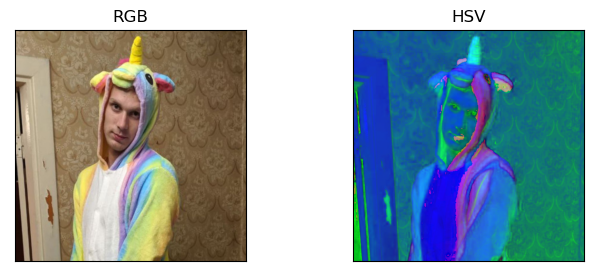

True

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(8, 3))
plt.subplot(121), plt.imshow(img_rgb), no_axes('RGB')#Виводимо RGB
plt.subplot(122), plt.imshow(img_hsv), no_axes('HSV')#Виводимо HSV
#plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)) #Оскільки у нас imshow() сприймає дані в RGB ми її конвертуєсо із HSV в RGB та виводимо 

plt.show();

cv2.imwrite("output\image_rgb.png", img_rgb)
cv2.imwrite("output\image_hsv.png", img_hsv)

## 4. Окремо відобразити колірні канали для зображень із колірними моделями RGB та HSV.

За допомогою індексу

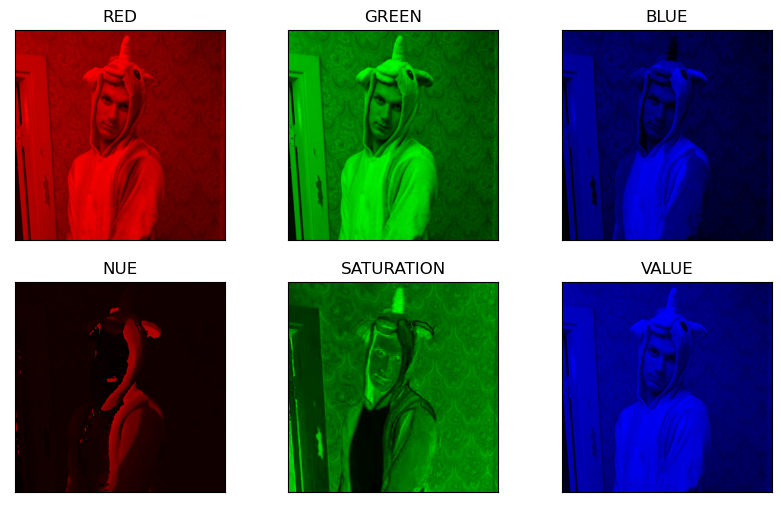

In [7]:
R = np.zeros(img_rgb.shape, dtype='uint8')
G = np.zeros(img_rgb.shape, dtype='uint8')
B = np.zeros(img_rgb.shape, dtype='uint8')
H = np.zeros(img_hsv.shape, dtype='uint8')
S = np.zeros(img_hsv.shape, dtype='uint8')
V = np.zeros(img_hsv.shape, dtype='uint8')

R[:, :, 0] = img_rgb[:, :, 0]
G[:, :, 1] = img_rgb[:, :, 1]
B[:, :, 2] = img_rgb[:, :, 2]
H[:, :, 0] = img_hsv[:, :, 0]
S[:, :, 1] = img_hsv[:, :, 1]
V[:, :, 2] = img_hsv[:, :, 2]

plt.figure(figsize=(10, 6))
plt.subplot(231), plt.imshow(R), no_axes('RED')
plt.subplot(232), plt.imshow(G), no_axes('GREEN')
plt.subplot(233), plt.imshow(B), no_axes('BLUE')
plt.subplot(234), plt.imshow(H), no_axes('NUE')
plt.subplot(235), plt.imshow(S), no_axes('SATURATION')
plt.subplot(236), plt.imshow(V), no_axes('VALUE')

plt.show()

За допомогою функції split

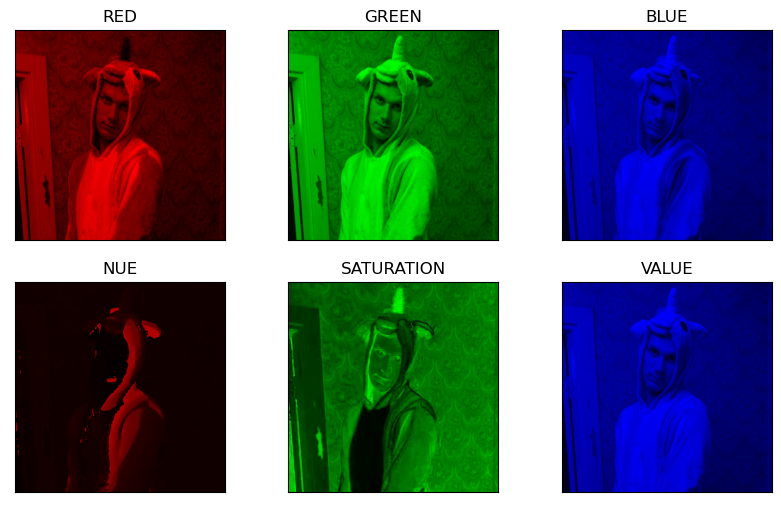

In [8]:
R = np.zeros(img_rgb.shape, dtype='uint8')
G = np.zeros(img_rgb.shape, dtype='uint8')
B = np.zeros(img_rgb.shape, dtype='uint8')
H = np.zeros(img_hsv.shape, dtype='uint8')
S = np.zeros(img_hsv.shape, dtype='uint8')
V = np.zeros(img_hsv.shape, dtype='uint8')

b, g, r = cv2.split(img_rgb)
h, s, v = cv2.split(img_hsv)

R[:, :, 0] = r
G[:, :, 1] = g
B[:, :, 2] = b
H[:, :, 0] = h
S[:, :, 1] = s
V[:, :, 2] = v

plt.figure(figsize=(10, 6))
plt.subplot(231), plt.imshow(R), no_axes('RED')
plt.subplot(232), plt.imshow(G), no_axes('GREEN')
plt.subplot(233), plt.imshow(B), no_axes('BLUE')
plt.subplot(234), plt.imshow(H), no_axes('NUE')
plt.subplot(235), plt.imshow(S), no_axes('SATURATION')
plt.subplot(236), plt.imshow(V), no_axes('VALUE')

plt.show()

## 5. Скопіювати область інтересу (Region of Interest) чорно-білого зображення, використовуючи наступні діапазони 0:img.shape[0]/2, 0:img.shape[1]/2

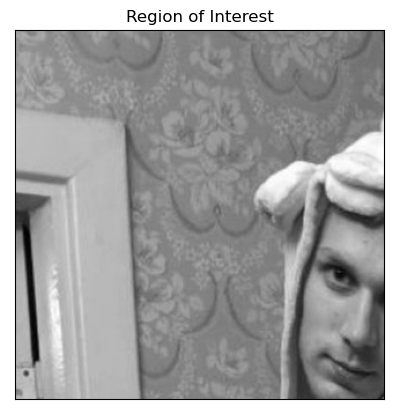

In [9]:
img_crop = img_gray[0:int(img_gray.shape[0]/2), 0:int(img_gray.shape[1]/2)]
plt.imshow(img_crop, cmap='gray'), no_axes('Region of Interest')
plt.show()

## 6. Зберегти область інтересу (Region of Interest).

In [10]:
cv2.imwrite("output\image_RegionOfInterest.png", img_crop)

True

## Додаткові завдання:

#### 1. Перетворити зображення з колірної моделі BGR в колірну модель HSV за допомогою формул.

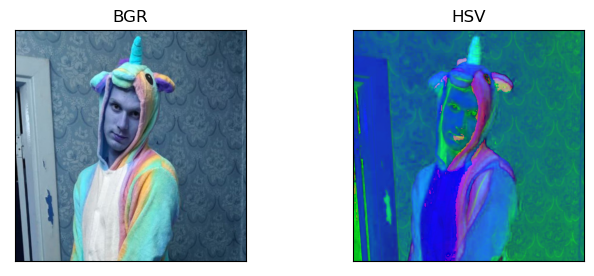

True

In [11]:
IMAGE_BGR = cv2.imread(URL)
#========================================================================
# rgb to hsv:  h <= 180;  s, v <= 255
#========================================================================
def bgr_to_hsv(b, g, r):                   
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (30 * ((g-b)/df) + 180) % 180
    elif mx == g:
        h = (30 * ((b-r)/df) + 60) % 180
    elif mx == b:
        h = (30 * ((r-g)/df) + 120) % 180
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*255
    v = mx*255
    return int(round(h)), int(round(s)), int(round(v))
#========================================================================
IMAGE_HSV = []
for i in range(IMAGE_BGR.shape[0]):
    for j in range(IMAGE_BGR.shape[1]):
        IMAGE_HSV.append([bgr_to_hsv(IMAGE_BGR[i,j,0],IMAGE_BGR[i,j,1],IMAGE_BGR[i,j,2])])

IMAGE_HSV = np.array(IMAGE_HSV)
IMAGE_HSV.shape = (IMAGE_BGR.shape[0],IMAGE_BGR.shape[1],3)    

plt.figure(figsize=(8, 3))
plt.subplot(121), plt.imshow(IMAGE_BGR), no_axes('BGR')
plt.subplot(122), plt.imshow(IMAGE_HSV), no_axes('HSV')

plt.show()

cv2.imwrite("output\DOP_IMAGE_BGR.png", IMAGE_BGR)
cv2.imwrite("output\DOP_IMAGE_HSV.png", IMAGE_HSV)

#### 2.Реалізувати функцію для визначення колірної відстані (Delta E76, Delta E94).

In [12]:
A0 = ((233, 45, 13), #  [X0 Y0 Z0]
      (14, 5, 133))  #  [X1 Y1 Z1] 

L = (A0[0][0], A0[1][0])
a = (A0[0][1], A0[1][1])
b = (A0[0][2], A0[1][2])

C1 = pow( pow(a[0],2) + pow(b[0],2), 1/2)
C2 = pow( pow(a[1],2) + pow(b[1],2), 1/2)

KL, KC, KH = 1, 1, 1
K1,K2 = 0.045, 0.015

SL = 1
SC = 1 + K1 * C1
SH = 1 + K2 * C2

delta_L = A0[0][0] - A0[1][0]
delta_a = A0[0][1] - A0[1][1]
delta_b = A0[0][2] - A0[1][2]
delta_C = C1 - C2
delta_H = pow( pow(delta_a,2) + pow(delta_b,2) + pow(delta_C,2) ,1/2)

#http://www.brucelindbloom.com/index.html?Eqn_DeltaE_CIE94.html
#https://en.wikipedia.org/wiki/Color_difference#cite_note-14

E74 = pow(pow(delta_L,2)+pow(delta_a,2)+pow(delta_b,2),1/2)
E94 = pow(pow(delta_L/(KL*SL),2)+pow(delta_C/(KC*SC),2)+pow(delta_H/(KH*SH),2),1/2)

print("delta E74 = " + str(E74))
print("delta E94 = " + str(E94))

delta E74 = 252.90512054918935
delta E94 = 226.58759536522928
